In [41]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def area_finder(height1, height2, width):
    area = (height1)*(width)*(1/2) + (height2*width)
    return area

## ------

ha_list : normal objects + outliers + problems

In [43]:
# ha_list = [('8133-12705', 0.130943), ('8256-12704', 0.12611), ('8616-3703', 0.135063),
#              ('8720-12702', 0.134953), ('8721-3701', 0.118101)]
# #('8137-9101', 0.118865),

# ha_list_uncertain = ['8155-6103(?)', '8254-6103(?)', '8338-12705(?)', '8606-12704(?)']

# ha_list2 = [('7815-6103', 0.135043), ('7991-12705', 0.113153), ('7992-9102', 0.119399), ('8132-6101', 0.129403),
#              ('8132-12703', 0.116056), ('8133-12704', 0.134471), ('8137-3702', 0.131997),
#              ('8143-6101', 0.126168), ('8244-12704', 0.115137), ('8318-6102', 0.12908), ('8329-6102', 0.142887),
#              ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), ('9049-1901', 0.131457)]

# obj1_43214 = [('8135-1902', 0.117997)]

# ha_list2_uncertain = ['8454-6102(?)', '8552-9102(?)', '8717-1902(?)']

problems = [('7991-12705', 0.113153), ('8132-6101', 0.129403), ('8244-12704', 0.115137)]

outlier = [('8616-3703', 0.135063), ('7992-9102', 0.119399), ('8318-6102', 0.12908)]

ha_list = [('8133-12705', 0.130943), ('8256-12704', 0.12611), ('8720-12702', 0.134953), 
           ('8721-3701', 0.118101), ('7815-6103', 0.135043),  ('8132-12703', 0.116056), 
           ('8133-12704', 0.134471), ('8137-3702', 0.131997), ('8143-6101', 0.126168),  
           ('8329-6102', 0.142887), ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), 
           ('9049-1901', 0.131457), ('8616-3703', 0.135063), ('7992-9102', 0.119399), ('8318-6102', 0.12908),
           ('7991-12705', 0.113153), ('8132-6101', 0.129403), ('8244-12704', 0.115137)]

In [44]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

In [45]:
ha_lum_dist = [615.1, 590.5, 635.6, 550.2, 636.0, 539.9, 633.1, 620.5, 590.8, 676.3, 654.3, 
               655.0, 587.9, 617.7, 636.1, 556.7, 605.6, 525.4, 607.3, 535.3]
ha_lum_dist_outlier = [636.1, 556.7, 605.6,]
ha_lum_dist_problems = [525.4, 607.3, 535.3]

In [46]:
csv_input = pd.read_csv('ha_list.csv')
csv_input['D_L Mpc'] = ha_lum_dist
csv_input.to_csv('ha_list.csv', index=False)

In [47]:
ha_table_1 = pd.read_csv('ha_list.csv')
ha_table_1

,mangaid,plateifu,nsa_z,flux,FWHM km/s,D_L Mpc
0,1-377841,8133-12705,0.130943,934.713926,302.661309,615.1
1,1-558912,8256-12704,0.126110,504.760950,385.112709,590.5
2,1-351719,8720-12702,0.134953,526.320724,427.571971,635.6
3,1-47511,8721-3701,0.118101,957.464989,376.122653,550.2
4,1-113521,7815-6103,0.135043,1823.267326,312.367039,636.0
5,1-338629,8132-12703,0.116056,2390.397300,331.133795,539.9
6,1-338922,8133-12704,0.134471,329.403979,419.217978,633.1
7,1-574402,8137-3702,0.131997,595.560544,426.802806,620.5
8,1-72322,8143-6101,0.126168,699.448344,351.933952,590.8
9,1-286804,8329-6102,0.142887,922.266210,736.597761,676.3


In [48]:
lum_dist = ha_table_1['D_L Mpc']
flux = ha_table_1['flux']

lum_dist_cm = []
luminosity = []

for i in range(len(lum_dist)):
    lum_dist_cm.append(Mpc_to_cm(lum_dist[i]))
    luminosity.append(luminosity_calc(Mpc_to_cm(lum_dist[i]), flux[i]))

In [49]:
csv_input = pd.read_csv('ha_list.csv')
csv_input['D_L cm'] = lum_dist_cm
csv_input.to_csv('ha_list.csv', index=False)

In [50]:
csv_input = pd.read_csv('ha_list.csv')
csv_input['L erg/s'] = luminosity
csv_input.to_csv('ha_list.csv', index=False)

In [51]:
ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

# DAP -- Table 1

In [52]:
DAP = pd.read_csv('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/Data/DAP.csv', sep=',')

In [53]:
DAP1 = DAP.copy()

In [54]:
# for i in ha_list:
#     print(DAP.loc[DAP['plateifu'] == i[0]])

In [55]:
idx = [24, 49, 134, 138, 3, 19, 23, 31, 34, 58, 67, 73, 84, 165, 120, 8, 54, 6, 21, 42]
idx_outlier = [120, 8, 54]
idx_problem = [6, 21, 42]
given_lum_dist = []
for i in range(len(ha_list)):
    given_lum_dist.append((DAP1.loc[DAP['plateifu'] == ha_list[i][0]])['ldist_nsa_z'][idx[i]])

In [56]:
csv_input = pd.read_csv('ha_list.csv')
csv_input['Given D_L Mpc'] = given_lum_dist
csv_input.to_csv('ha_list.csv', index=False)
ha_table_1 = pd.read_csv('ha_list.csv')

In [57]:
# ha_table_1

In [58]:
# ha_table_1.rename(columns = {'Given L erg/s':'Given D_L Mpc'}, inplace = True)

In [59]:
given_flux = []
for i in range(len(ha_list)):
    given_flux.append((DAP.loc[DAP1['plateifu'] == ha_list[i][0]])['emline_sflux_tot_ha_6564'][idx[i]])

In [60]:
csv_input = pd.read_csv('ha_list.csv')
csv_input['Given flux'] = given_flux
csv_input.to_csv('ha_list.csv', index=False)
ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

In [61]:
res = np.polyfit(ha_table_1['flux'], ha_table_1['Given flux'], 1)
res

array([  0.85362203, 384.29529895])

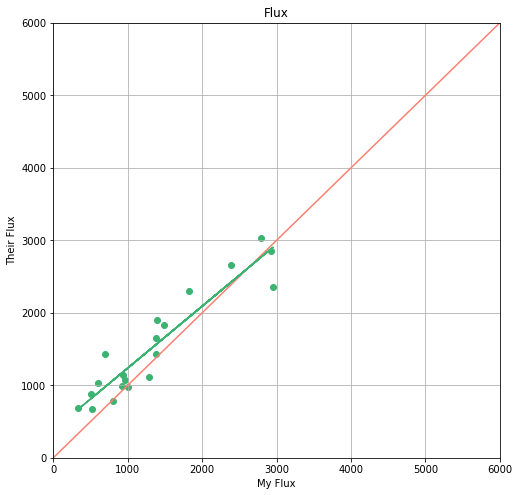

In [63]:
plt.figure(figsize = (8,8))
plt.grid()
plt.xlim(0,6000)
plt.ylim(0,6000)
plt.xlabel('My Flux')
plt.ylabel('Their Flux')
plt.title('Flux')
plt.plot([0,6000], [0,6000], color = 'salmon')
plt.scatter(ha_table_1['flux'], ha_table_1['Given flux'], color = 'mediumseagreen')
plt.plot(ha_table_1['flux'], (res[0]*ha_table_1['flux'])+res[1], color = 'mediumseagreen')

In [64]:
their_lum = []
for i in range(len(idx)):
    their_lum.append(luminosity_calc(ha_table_1['D_L cm'][i], ha_table_1['Given flux'][i]))

In [65]:
csv_input = pd.read_csv('ha_list.csv')
csv_input['Their Lum'] = their_lum
csv_input.to_csv('ha_list.csv', index=False)
ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

In [66]:
res2 = np.polyfit(np.log10(ha_table_1['L erg/s']), np.log10(ha_table_1['Their Lum']),1)
res2

array([ 0.71780385, 11.85017047])

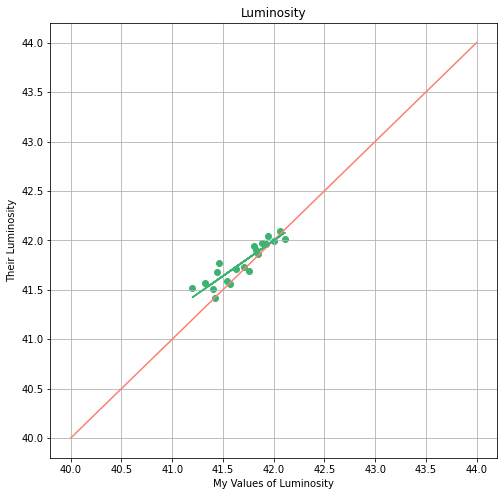

In [67]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My Values of Luminosity')
plt.ylabel('Their Luminosity')
plt.title('Luminosity')
plt.plot([40,44], [40,44], color = 'salmon')
plt.scatter(np.log10(ha_table_1['L erg/s']), np.log10(ha_table_1['Their Lum']), color = 'mediumseagreen')
plt.plot(np.log10(ha_table_1['L erg/s']), (res2[0]*np.log10(ha_table_1['L erg/s'])) + res2[1],
        color = 'mediumseagreen')

$$ M_{BH} = \big(2.0^{+0.4}_{-0.3}\big) \times 10^6 \bigg(\frac{L_{H_\alpha}}{10^{42} erg s^{-1}}\bigg)^{0.55 \pm 0.02} \times \bigg(\frac{FWHM_{H_\alpha}}{10^3 kms^{-1}}\bigg)^{2.06 \pm 0.06} M_\odot$$

In [68]:
M_BH = np.array((2) * (10**6) * (ha_table_1['L erg/s'] / 10**42)**(0.55) * (ha_table_1['FWHM km/s'] / 10**3)**2.06)

In [69]:
log_mbh = [np.log10(i) for i in M_BH]

In [70]:
csv_input = pd.read_csv('ha_list.csv')
csv_input['log10 (M_BH / M_sun)'] = log_mbh
csv_input.to_csv('ha_list.csv', index=False)
ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

Carroll and Ostlie 

$$ M_{BH} = (1.66 \pm 0.24) \times 10^8 M_\odot \times \Big(\frac{\sigma}{200 kms^{-1}}\Big)^{4.86 \pm 0.43} $$ 

In [71]:
given_vdis = []
for i in range(len(ha_list)):
    given_vdis.append(DAP.loc[DAP['plateifu'] == ha_list[i][0]]['stellar_sigma_1re'][idx[i]])

In [72]:
csv_input = pd.read_csv('ha_list.csv')
csv_input['Given vdis'] = given_vdis
csv_input.to_csv('ha_list.csv', index=False)
ha_table_1 = pd.read_csv('ha_list.csv')
ha_table_1

,mangaid,plateifu,nsa_z,flux,FWHM km/s,D_L Mpc,D_L cm,L erg/s,Given D_L Mpc,Given flux,Their Lum,log10 (M_BH / M_sun),Given vdis
0,1-377841,8133-12705,0.130943,934.713926,302.661309,615.1,1.898002e+27,4.231378e+41,430.5657,1138.4650,5.153743e+41,5.026366,115.0897
1,1-558912,8256-12704,0.126110,504.760950,385.112709,590.5,1.822094e+27,2.105897e+41,413.3847,880.6425,3.674101e+41,5.075231,237.1582
2,1-351719,8720-12702,0.134953,526.320724,427.571971,635.6,1.961258e+27,2.544075e+41,444.8922,668.3733,3.230714e+41,5.213950,149.9343
3,1-47511,8721-3701,0.118101,957.464989,376.122653,550.2,1.697741e+27,3.467973e+41,385.1212,1069.3070,3.873069e+41,5.173250,152.9260
4,1-113521,7815-6103,0.135043,1823.267326,312.367039,636.0,1.962492e+27,8.824218e+41,445.2144,2307.7280,1.116890e+42,5.230162,104.5897
5,1-338629,8132-12703,0.116056,2390.397300,331.133795,539.9,1.665959e+27,8.336973e+41,377.9462,2656.6560,9.265601e+41,5.268792,125.4166
6,1-338922,8133-12704,0.134471,329.403979,419.217978,633.1,1.953544e+27,1.579738e+41,443.1667,686.8413,3.293917e+41,5.082478,204.2926
7,1-574402,8137-3702,0.131997,595.560544,426.802806,620.5,1.914664e+27,2.743602e+41,434.3250,1029.4190,4.742282e+41,5.230375,136.5246
8,1-72322,8143-6101,0.126168,699.448344,351.933952,590.8,1.823020e+27,2.921112e+41,413.5903,1429.5290,5.970155e+41,5.072792,222.9631
9,1-286804,8329-6102,0.142887,922.266210,736.597761,676.3,2.086845e+27,5.047156e+41,473.4268,987.6719,5.405092e+41,5.864200,163.2049


In [73]:
a = 1.66 * 10**8
b = 4.86
M_BH_Carroll_Ostlie = np.log10(a * (np.array(given_vdis)/200)**b)
M_BH_Carroll_Ostlie

array([7.0537395 , 8.5797877 , 7.61198115, 7.65368157, 6.85181845,
       7.23510772, 8.26493012, 7.41422735, 8.44951466, 7.79098563,
       7.38937027, 7.99447727, 9.47929719, 7.25724292, 7.62754242,
       7.39895027, 7.96119917, 7.48877599, 7.89840062, 7.512521  ])

**Find the source**

$$ M_{BH} = 9.75 \times 10^6 M_\odot \times \Big(\frac{\sigma}{200 kms^{-1}}\Big)^{0.85} $$ 

In [74]:
d = 9.75 * 10**6
e = 0.85
M_BH_unknown_source = np.log10(d * (np.array(given_vdis)/200)**e)

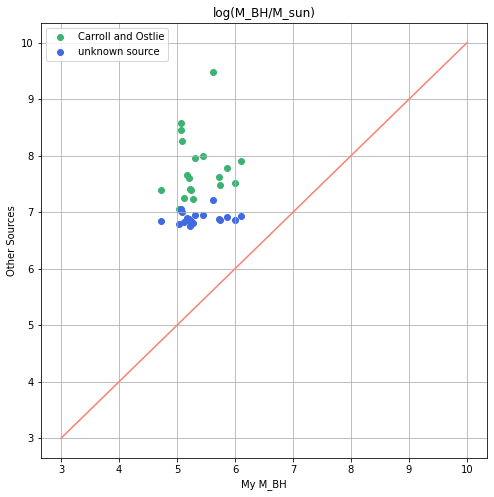

In [75]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My M_BH')
plt.ylabel('Other Sources')
plt.title('log(M_BH/M_sun)')
plt.plot([3,10], [3,10], color = 'salmon')
plt.scatter(ha_table_1['log10 (M_BH / M_sun)'], M_BH_Carroll_Ostlie, color = 'mediumseagreen',
            label = 'Carroll and Ostlie')
plt.scatter(ha_table_1['log10 (M_BH / M_sun)'], M_BH_unknown_source, color = 'royalblue',
            label = 'unknown source')
plt.legend()

Marinello et al. 2019

$$ \log\Big(\frac{M_{BH}}{M_\odot}\Big) = a + b \times \log\Big(\frac{FWHM}{{10}^3 kms^{-1}}\Big) + c \times \log\Big(\frac{\lambda L_\lambda}{10^{42}ergs^{-1}}\Big)$$

$a = 6.91\pm 0.02$

$b=2.0$

$c=0.50$

In [95]:
f = 6.91
g = 2
h = 0.5

fwhm = np.log10(np.array(ha_table_1['FWHM km/s'])/1000)
fwhm
lum = np.log10(6563/(10**42) * np.array(ha_table_1['L erg/s']))
lum
marinello = f + g * fwhm + h * lum
marinello

array([7.59370592, 7.6514455 , 7.7833346 , 7.73924804, 7.78071971,
       7.8190624 , 7.66272355, 7.7981663 , 7.64424766, 8.40453534,
       7.7999144 , 7.9996112 , 8.15177902, 7.6829055 , 8.26746223,
       7.29458969, 7.8488406 , 8.29197615, 8.63222403, 8.53014563])

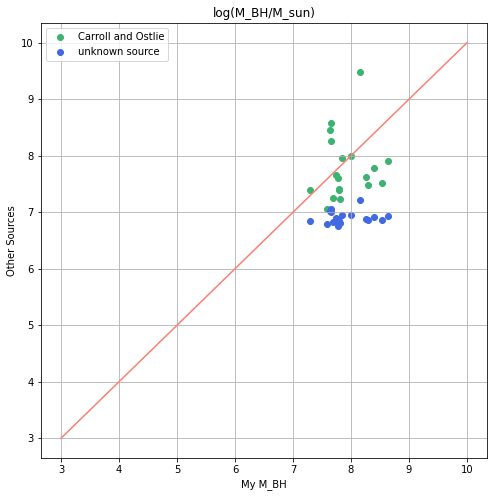

In [96]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My M_BH')
plt.ylabel('Other Sources')
plt.title('log(M_BH/M_sun)')
plt.plot([3,10], [3,10], color = 'salmon')
plt.scatter(marinello, M_BH_Carroll_Ostlie, color = 'mediumseagreen',
            label = 'Carroll and Ostlie')
plt.scatter(marinello, M_BH_unknown_source, color = 'royalblue',
            label = 'unknown source')
plt.legend()